In [8]:
import numpy as np

In [9]:
from scipy.special import airy

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

## Check how good the asymptotic forms of the Airy functions work

### Ai(z)

In [11]:
def Ai_asymp_neg(z):
    return 1.0/(np.sqrt(np.pi) * (-z)**0.25) * np.sin(2.0/3.0 * (-z)**1.5 + np.pi/4.)
def Ai_asymp_pos(z):
    return 1.0/(2 * np.sqrt(np.pi) * (z)**0.25) * np.exp(-2.0/3.0 * z**1.5)

(-0.6, 1)

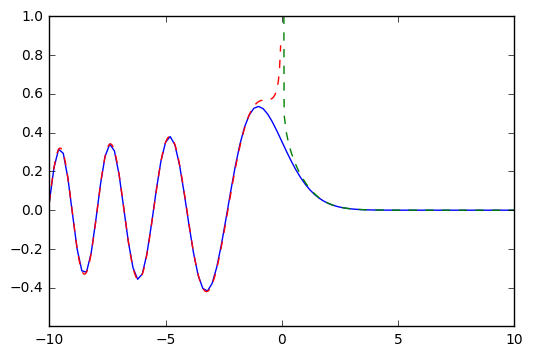

In [12]:
xs = np.linspace(-10, 10, 101)
xs_neg = np.linspace(-10, 0, 201, endpoint=False)
xs_pos = np.linspace(0.00001, 10, 101)

plt.plot(xs, airy(xs)[0])
plt.plot(xs_neg, Ai_asymp_neg(xs_neg), "r--")
plt.plot(xs_pos, Ai_asymp_pos(xs_pos), "g--")
plt.ylim(-0.6, 1)

### Bi(z)

In [13]:
def Bi_asymp_neg(z):
    return 1.0/(np.sqrt(np.pi) * (-z)**0.25) * np.cos(2.0/3.0 * (-z)**1.5 + np.pi/4.)
def Bi_asymp_pos(z):
    return 1.0/(np.sqrt(np.pi) * (z)**0.25) * np.exp(2.0/3.0 * z**1.5)

(-0.6, 2)

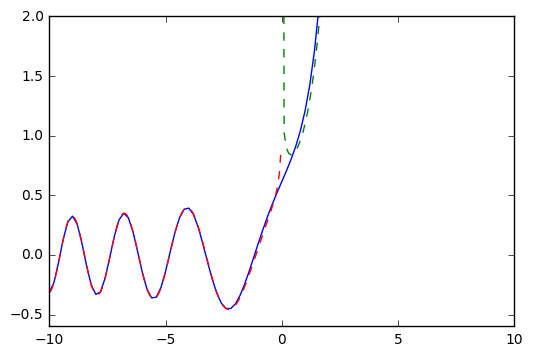

In [14]:
xs = np.linspace(-10, 10, 101)
xs_neg = np.linspace(-10, 0, 201, endpoint=False)
xs_pos = np.linspace(0.00001, 10, 101)

plt.plot(xs, airy(xs)[2])
plt.plot(xs_neg, Bi_asymp_neg(xs_neg), "r--")
plt.plot(xs_pos, Bi_asymp_pos(xs_pos), "g--")
plt.ylim(-0.6, 2)

### Now the WKB wave function together with the Airy function

In [94]:
from scipy.integrate import quad
from scipy.misc import derivative
from scipy.optimize import brentq

def plot_patching_region(V, E, start, stop, m=1):

    x_t = brentq(lambda x: V(x) - E, start, stop)
    xs = np.linspace(start, stop, 1001)

    def calc_psi_wkb(x):
        def p(x):
            if x < x_t:
                return np.sqrt(2 * m * (E - V(x)))
            else:
                return np.sqrt(2 * m * (V(x) - E))
            
        if x < x_t:
            return 2/np.sqrt(p(x)) * np.sin(quad(p , x, x_t)[0] + np.pi/4)
        else:
            return 1/np.sqrt(p(x)) * np.exp(-quad(p, x_t, x)[0])
    
    psi_wkb = np.vectorize(calc_psi_wkb)(xs)

    alpha = (2 * m * derivative(V, 0, dx=(stop-start)/1e7))**(1.0/3.0)
    airy_fun = np.sqrt(4 * np.pi /alpha) * airy(alpha*(xs-x_t))[0]

    plt.plot(xs, psi_wkb)
    plt.plot(xs, airy_fun)

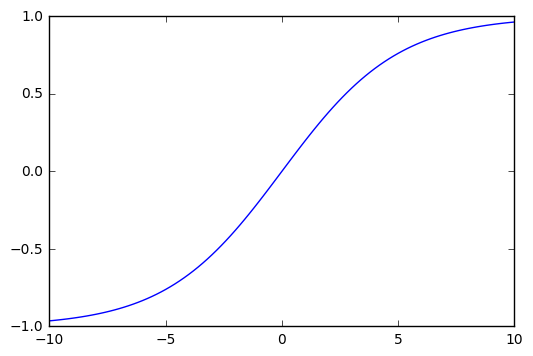

In [103]:
start = -10
stop = 10

def V(x):
    return np.tanh(x/5.)

xs = np.linspace(start, stop, 101)
plt.plot(xs, V(xs))

/home/michael/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in double_scalars


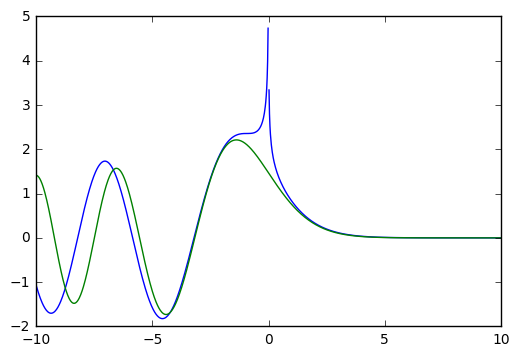

In [110]:
plot_patching_region(V, E=0., start=-10, stop=10)